In [ ]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Mounting from google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Setting up constant
image_size = 256
channels = 3

In [ ]:
def ImageAugmentation(location, shuffle):
  datagen = ImageDataGenerator(
      rescale = 1./255, rotation_range = 10, horizontal_flip = True)
  image_generator = datagen.flow_from_directory(
      location, target_size = (image_size, image_size),batch_size = 32,class_mode = "sparse", shuffle = shuffle)

  return image_generator

In [ ]:
train_generator = ImageAugmentation('/content/drive/MyDrive/Leaves Disease Training CNN/train',shuffle = True)
test_generator = ImageAugmentation('/content/drive/MyDrive/Leaves Disease Training CNN/test',shuffle = False)
val_generator = ImageAugmentation('/content/drive/MyDrive/Leaves Disease Training CNN/val',shuffle = True)

Found 21472 images belonging to 19 classes.
Found 2700 images belonging to 19 classes.
Found 2678 images belonging to 19 classes.


In [ ]:
# printing the class name
class_names = list(train_generator.class_indices.keys())
for index, name in enumerate(class_names):
  print(index,'--',name)

0 -- Grape___Black_rot
1 -- Grape___Esca_(Black_Measles)
2 -- Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
3 -- Grape___healthy
4 -- Pepper,_bell___Bacterial_spot
5 -- Pepper,_bell___healthy
6 -- Potato___Early_blight
7 -- Potato___Late_blight
8 -- Potato___healthy
9 -- Tomato___Bacterial_spot
10 -- Tomato___Early_blight
11 -- Tomato___Late_blight
12 -- Tomato___Leaf_Mold
13 -- Tomato___Septoria_leaf_spot
14 -- Tomato___Spider_mites Two-spotted_spider_mite
15 -- Tomato___Target_Spot
16 -- Tomato___Tomato_Yellow_Leaf_Curl_Virus
17 -- Tomato___Tomato_mosaic_virus
18 -- Tomato___healthy


In [ ]:
input_shape = (image_size,image_size,channels)
n_classes = 19
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    # 1st convolution and pooling layer
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',strides=(1, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    # 2nd convolution and pooling layer
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',strides=(1, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    # 3rd convolution and pooling layer
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',strides=(1, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    # 4th convolution and pooling layer
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',strides=(1, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    # 5th convolution and pooling layer
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',strides=(1, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),
    # 6th convolution and pooling layer
    layers.Conv2D(128,kernel_size=(3,3),activation='relu',padding='same',strides=(1, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
# Summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 128, 128, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 64, 64, 64)       

In [ ]:
# Compiling the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,steps_per_epoch=len(train_generator),batch_size=32,validation_data=val_generator,validation_steps=len(val_generator),
                    verbose=1,epochs=10)

Epoch 1/10
671/671 [==============================] - 7335s 11s/step - loss: 1.4102 - accuracy: 0.5365 - val_loss: 0.8875 - val_accuracy: 0.6998
Epoch 2/10
671/671 [==============================] - 418s 623ms/step - loss: 0.7710 - accuracy: 0.7392 - val_loss: 0.5823 - val_accuracy: 0.8174
Epoch 3/10
671/671 [==============================] - 419s 625ms/step - loss: 0.5870 - accuracy: 0.8022 - val_loss: 0.4326 - val_accuracy: 0.8536
Epoch 4/10
671/671 [==============================] - 424s 632ms/step - loss: 0.4788 - accuracy: 0.8368 - val_loss: 0.4041 - val_accuracy: 0.8630
Epoch 5/10
671/671 [==============================] - 425s 634ms/step - loss: 0.4173 - accuracy: 0.8541 - val_loss: 0.3469 - val_accuracy: 0.8906
Epoch 6/10
671/671 [==============================] - 468s 698ms/step - loss: 0.3705 - accuracy: 0.8702 - val_loss: 0.3295 - val_accuracy: 0.8902
Epoch 7/10
671/671 [==============================] - 432s 645ms/step - loss: 0.3388 - accuracy: 0.8839 - val_loss: 0.2717 - 

In [ ]:
# Checking the accuracy and loss percentage
test_loss, test_accuracy = model.evaluate(test_generator)
print('The accuracy is {:5.2f}%'.format(test_accuracy*100))

85/85 [==============================] - 668s 8s/step - loss: 0.1837 - accuracy: 0.9370
The accuracy is 93.70%


<h4>Loss Graph</h4>

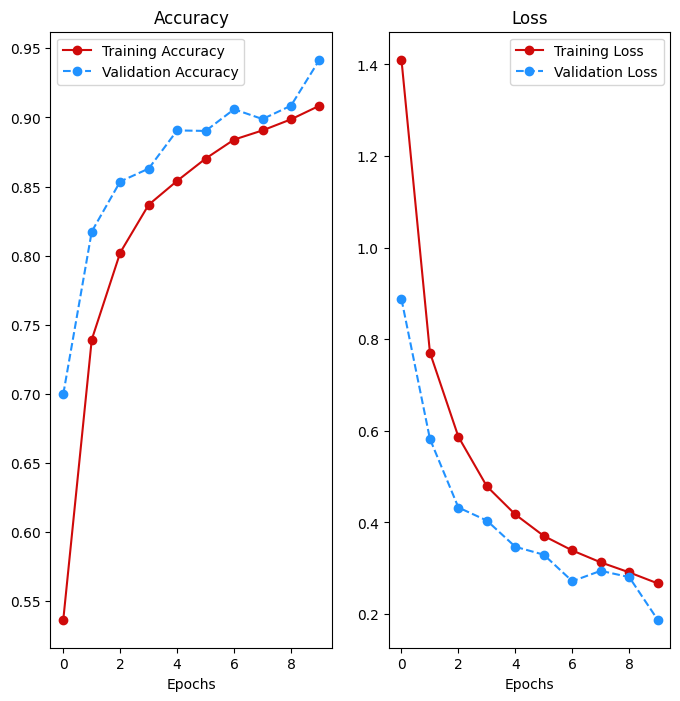

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs_range = range(10)

# plotting the accuracy graph
plt.rcParams['figure.figsize'] = (8,8)
plt.subplot(1,2,1)
plt.plot(epochs_range, accuracy,'-o', label='Training Accuracy',color="#CF0A0A")
plt.plot(epochs_range, val_accuracy,'o--', label='Validation Accuracy',color="#2192FF")
plt.xlabel("Epochs")
plt.legend()
plt.title('Accuracy')
# plotting the loss graph
plt.subplot(1,2,2)
plt.plot(epochs_range, loss,'-o', label='Training Loss',color="#CF0A0A")
plt.plot(epochs_range, val_loss,'o--', label='Validation Loss',color="#2192FF")
plt.xlabel("Epochs")
plt.legend()
plt.title('Loss')
plt.show();

<h4>Confusion Matrix</h4>

85/85 [==============================] - 43s 509ms/step


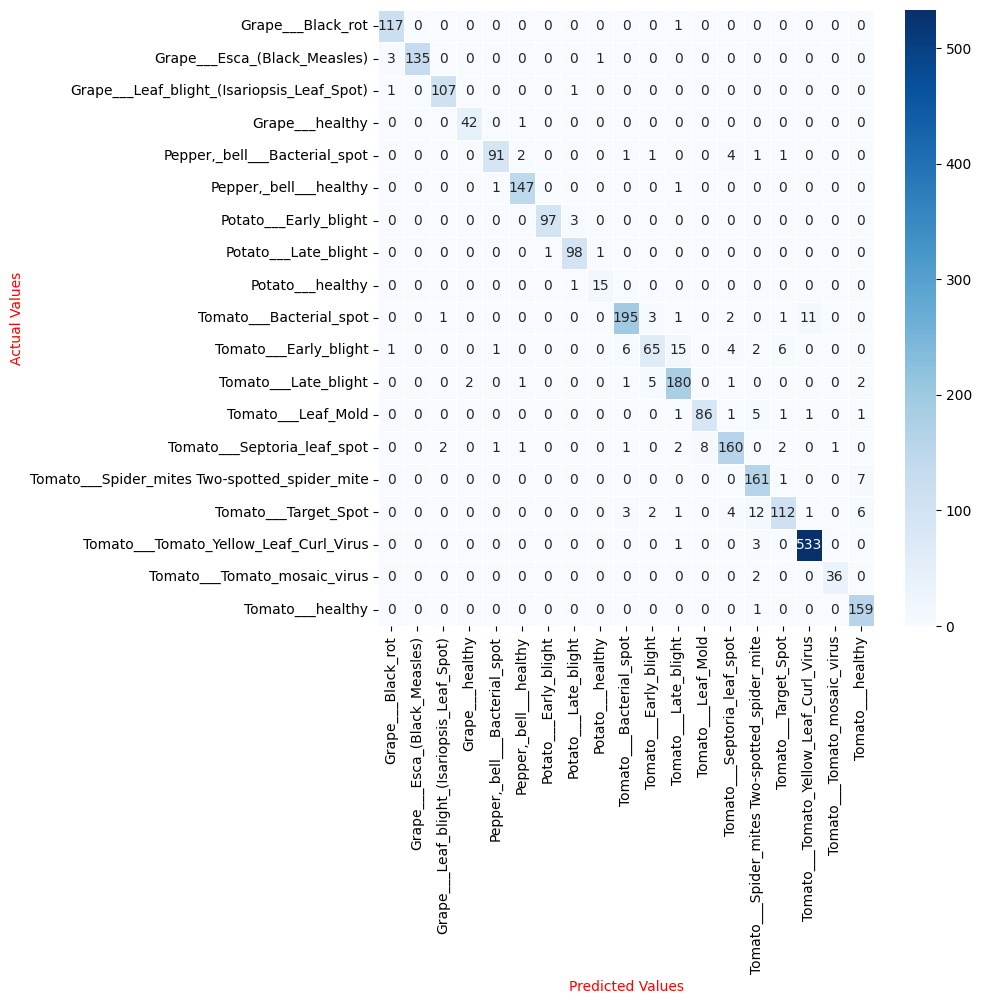

In [ ]:
# predicting the images from test_generator
y_prob = model.predict(test_generator, verbose = True)
y_pred = np.argmax(y_prob, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
# plotting the matrix
sns.heatmap(cm,annot=True,cmap="Blues",fmt='g',linewidth=.5,xticklabels=class_names,yticklabels=class_names)
plt.xlabel("Predicted Values",size=10,color='red')
plt.ylabel("Actual Values",size=10,color='red')
plt.show()

<h4> Classification Report </h4>

In [ ]:
# classification report
print(classification_report(test_generator.classes, y_pred, target_names=class_names))

                                               precision    recall  f1-score   support

                            Grape___Black_rot       0.96      0.99      0.97       118
                 Grape___Esca_(Black_Measles)       1.00      0.97      0.99       139
   Grape___Leaf_blight_(Isariopsis_Leaf_Spot)       0.97      0.98      0.98       109
                              Grape___healthy       0.95      0.98      0.97        43
                Pepper,_bell___Bacterial_spot       0.97      0.90      0.93       101
                       Pepper,_bell___healthy       0.97      0.99      0.98       149
                        Potato___Early_blight       0.99      0.97      0.98       100
                         Potato___Late_blight       0.95      0.98      0.97       100
                             Potato___healthy       0.88      0.94      0.91        16
                      Tomato___Bacterial_spot       0.94      0.91      0.93       214
                        Tomato___Early_bli

<h4>Predicting Random Images</h4>

In [ ]:
def predict(model,img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i])
  img_array = tf.expand_dims(img_array,0)

  predictions = model.predict(img_array, verbose=0)
  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

In [ ]:
test_generator.shuffle = False

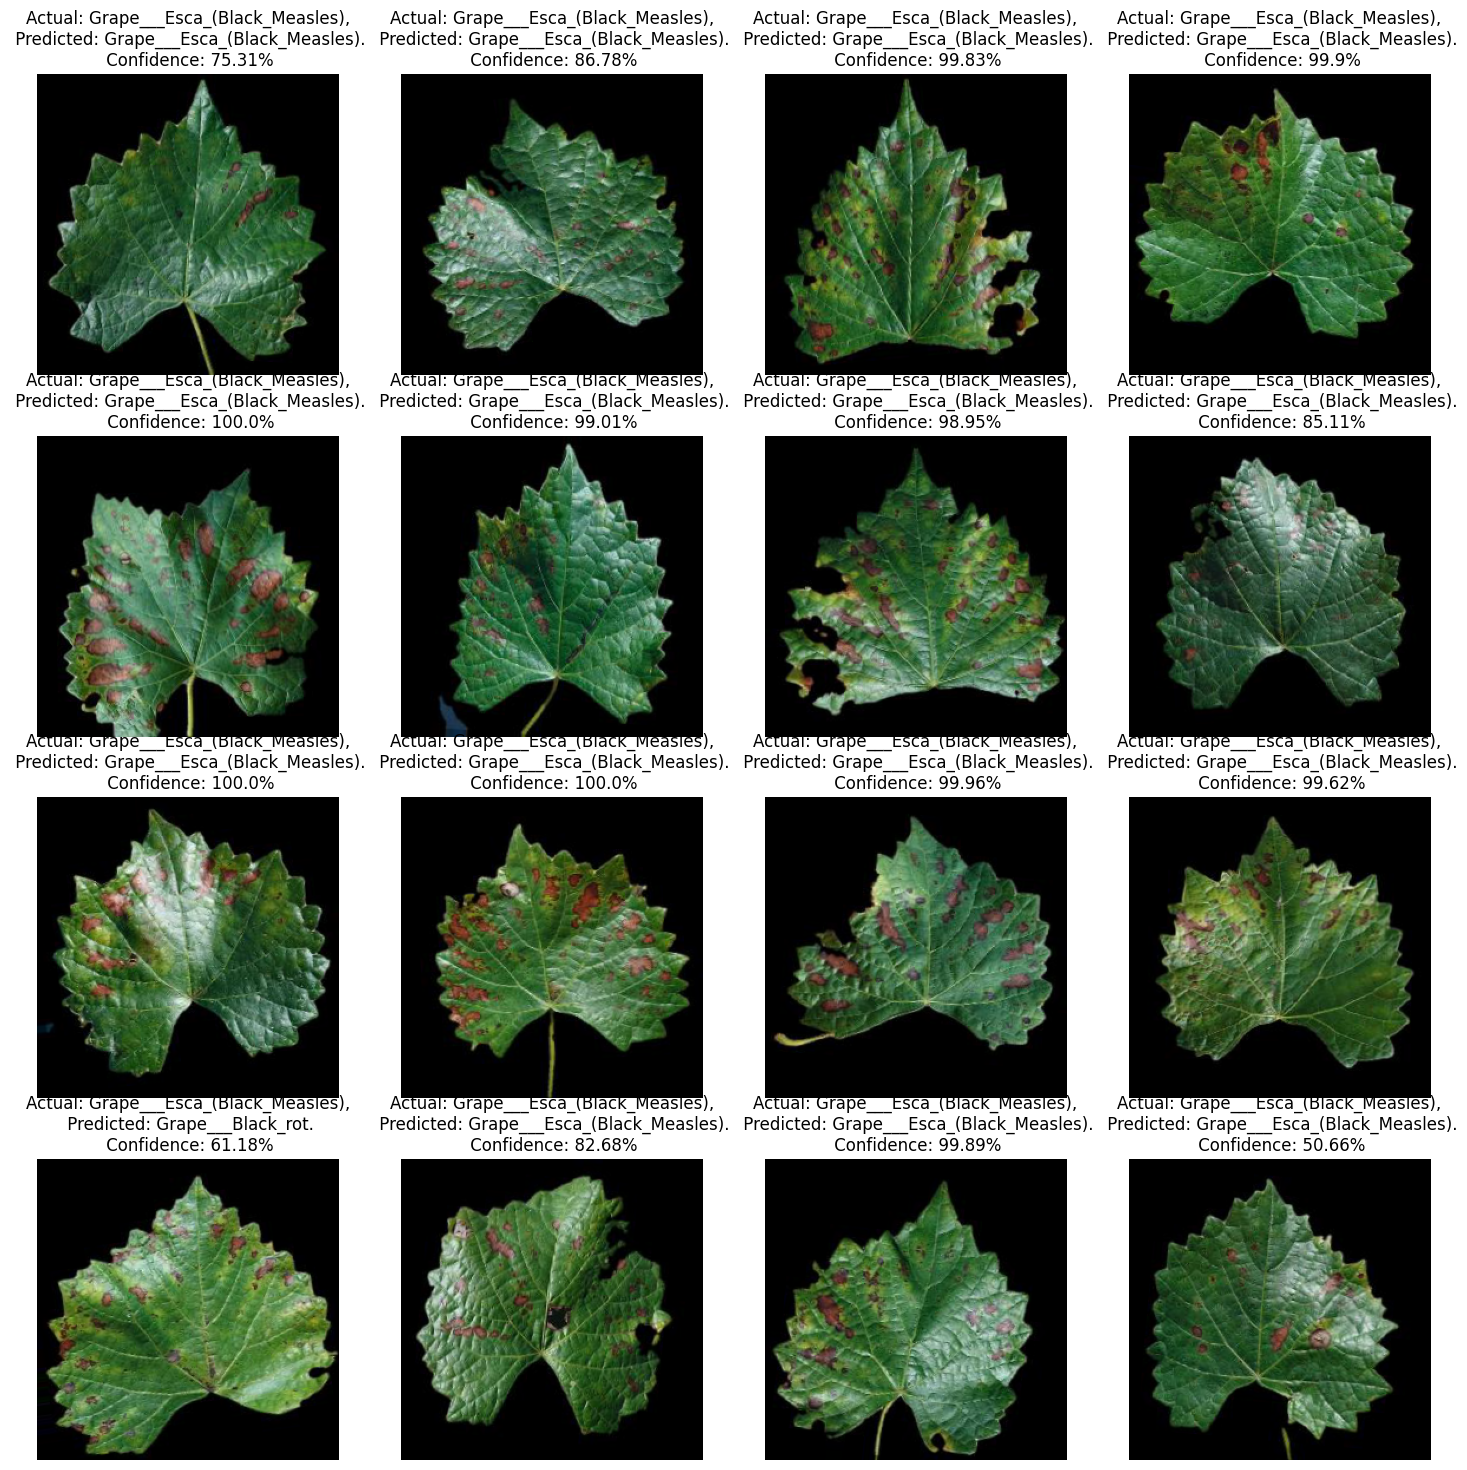

In [ ]:
plt.figure(figsize=(18, 18))
for images, labels in test_generator:
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [ ]:
# from tensorflow.keras.models import Sequential, save_model
# filepath = '/content/drive/MyDrive/Leaves Disease Training CNN/saved_model'
# save_model(model,filepath)
# save_model(model, filepath, save_format='h5')
model.save('my_model')

In [ ]:
model.save('model_19.h5')

In [ ]:
model_json = model.to_json()
with open('model.json','w') as json_file:
  json_file.write(model_json)